## Lab 5: Decision Tree

Tiatnic Survival Dataset

In [26]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the data sets- train and test 
train = pd.read_csv('train.csv')


In [5]:
#Look at top values of train data 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Print the column names of train data
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#Check the data type of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#Print the dimension of train and test data
train.shape

(891, 12)

In [17]:
#Print summary statistics of train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#Print the number of missing values in each column of train and test data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

/home/naveen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


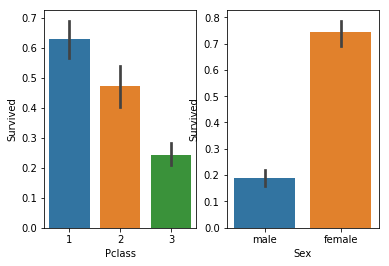

In [27]:
#Barchart of Survived, Pclass, Sex, Embarked
import seaborn as sns
plt.figure(1)
plt.subplot(1,2,1)
sns.barplot(train['Pclass'],train['Survived'])
plt.subplot(1,2,2)
sns.barplot(train['Sex'],train['Survived'])

In [9]:
#Histogram of Age, Parch, Fare


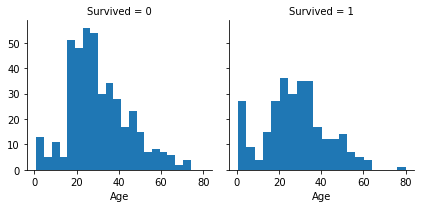

In [20]:
#Plot histogram of age for survived and did not survived class
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
#Count class and geder wise survival rate - plot with appropriate chart


## Handling Missing Values

In [10]:
#Replace the msiing values in Embarked column by 'S'


In [11]:
#Impute the missing values in Fare column with median value


In [10]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
age_avg = data['Age'].mean()
age_std = data['Age'].std()
age_null_count = data['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
data.loc[np.isnan(data['Age']), 'Age'] = age_null_random_list
data['Age'] = data['Age'].astype(int)

## Feature Engineering - Creating new features

In [12]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1


In [13]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False


In [14]:
#Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [15]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin


## Check the preprocessed data

In [15]:
#Print the top five elemnets


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_cabin,FamilySize,IsAlone
0,0,3,male,22,0,7.2500,S,False,2,False
1,1,1,female,38,0,71.2833,C,True,2,False
2,1,3,female,26,0,7.9250,S,False,1,True
3,1,1,female,35,0,53.1000,S,True,2,False
4,0,3,male,35,0,8.0500,S,False,1,True


In [16]:
#Do a pairplot of all features


## Model Building

In [17]:
#Prepare X and y


In [17]:
X[0]

array([3, 'male', 22, 0, 7.25, 'S', False, 2, False], dtype=object)

In [18]:
# Label encoding of categorical features


In [19]:
X[0]

array([3, 1, 22, 0, 7.25, 2, 0, 2, 0], dtype=object)

In [20]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation


In [19]:
# Create the model
# Fitting the decision tree with default hyperparameters


In [20]:
#Print the tree


<img src="tree2.png">

In [24]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score



             precision    recall  f1-score   support

          0       0.80      0.78      0.79        55
          1       0.67      0.69      0.68        35

avg / total       0.75      0.74      0.75        90

[[43 12]
 [11 24]]
0.7444444444444445


# Find a better model

In [21]:
# GridSearchCV to find optimal max_depth


In [22]:
# scores of GridSearch CV



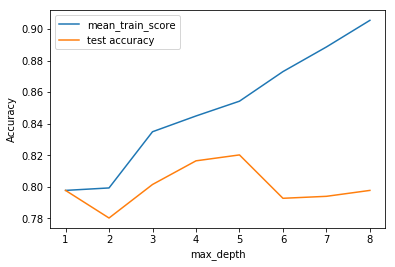

In [37]:
# plotting accuracies with max_depth


In [23]:
# GridSearchCV to find optimal min_sample_leaf


In [24]:
# scores of GridSearch CV


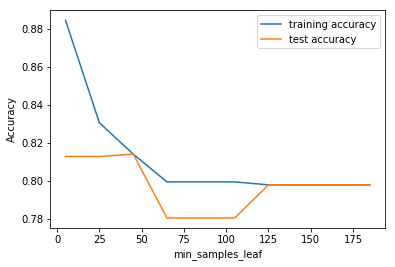

In [40]:
# plotting accuracies with min_samples_leaf


In [25]:
#GridSearchCV to find optimal min_samples_split


In [26]:
# scores of GridSearch CV


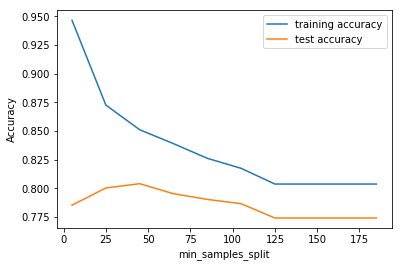

In [43]:
# plotting accuracies with min_samples_leaf


In [27]:
# Create a model with optimal hyperparameters - max_depth, min_samples_leaf, min_samples_split
#Decide the optimal values by looking at the previous plottings


In [28]:
#Print the otimal Model


<img src="tree3.png">

In [47]:
# Let's check the evaluation metrics of our optimal model


             precision    recall  f1-score   support

          0       0.77      0.91      0.83        55
          1       0.80      0.57      0.67        35

avg / total       0.78      0.78      0.77        90

[[50  5]
 [15 20]]
0.7777777777777778


In [22]:
#Test the perfromance of the optimal model on Test Data


## End